In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
tDaily_gen = pd.read_csv("tDaily_gen.csv",parse_dates=['Datetime'],index_col=['Datetime'])
tDaily_ny_gen = pd.read_csv("tDaily_ny_gen.csv",parse_dates=['Datetime'],index_col=['Datetime'])
tDaily_ny_covid = pd.read_csv("tDaily_ny_covid.csv",parse_dates=['Datetime'],index_col=['Datetime'])

In [3]:
#corr = tDaily_gen.corr()
#print(corr)
# clustergrid = sns.clustermap(corr,annot=True)

In [4]:
#print(tDaily_gen)

In [5]:
# read in the data from the structured sources.....
# start with just the nyc data per day 
def parser(date):  
    return pd.to_datetime(date,utc=True)

nyc_actual = pd.read_csv("../coronavirus-data/case-hosp-death.csv",parse_dates=['DATE_OF_INTEREST'],date_parser=parser,index_col=['DATE_OF_INTEREST'])
nyc_actual.head()


,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
DATE_OF_INTEREST,,,
2020-02-29 00:00:00+00:00,1,14,0
2020-03-01 00:00:00+00:00,1,4,0
2020-03-02 00:00:00+00:00,0,22,0
2020-03-03 00:00:00+00:00,2,20,0
2020-03-04 00:00:00+00:00,5,22,0


In [6]:
nyc_self = nyc_actual.corr()
print(nyc_self)

                    CASE_COUNT  HOSPITALIZED_COUNT  DEATH_COUNT
CASE_COUNT            1.000000            0.953366     0.752953
HOSPITALIZED_COUNT    0.953366            1.000000     0.800798
DEATH_COUNT           0.752953            0.800798     1.000000


In [7]:
print(nyc_actual.dtypes)

CASE_COUNT            int64
HOSPITALIZED_COUNT    int64
DEATH_COUNT           int64
dtype: object


In [8]:
# merge the structured and unstructured data 
merged = pd.merge(left=nyc_actual, right=tDaily_gen, left_index=True,right_index=True)
print(merged)

                           CASE_COUNT  HOSPITALIZED_COUNT  DEATH_COUNT  \
2020-02-29 00:00:00+00:00           1                  14            0   
2020-03-01 00:00:00+00:00           1                   4            0   
2020-03-02 00:00:00+00:00           0                  22            0   
2020-03-03 00:00:00+00:00           2                  20            0   
2020-03-04 00:00:00+00:00           5                  22            0   
...                               ...                 ...          ...   
2020-04-29 00:00:00+00:00        2334                 419          200   
2020-04-30 00:00:00+00:00        2003                 329          184   
2020-05-01 00:00:00+00:00        1863                 365          171   
2020-05-02 00:00:00+00:00        1047                 267          160   
2020-05-03 00:00:00+00:00         776                 238          146   

                              senti  weightedSenti  rolling_sum  \
2020-02-29 00:00:00+00:00  0.290323       0.

                      CASE_COUNT  HOSPITALIZED_COUNT  DEATH_COUNT     senti  \
CASE_COUNT              1.000000            0.948661     0.730299  0.335808   
HOSPITALIZED_COUNT      0.948661            1.000000     0.782964  0.264011   
DEATH_COUNT             0.730299            0.782964     1.000000  0.250089   
senti                   0.335808            0.264011     0.250089  1.000000   
weightedSenti           0.247279            0.207066     0.156832  0.199905   
rolling_sum             0.344551            0.267289     0.252578  0.996191   
rolling_sum_weighted    0.251371            0.210283     0.160111  0.206899   

                      weightedSenti  rolling_sum  rolling_sum_weighted  
CASE_COUNT                 0.247279     0.344551              0.251371  
HOSPITALIZED_COUNT         0.207066     0.267289              0.210283  
DEATH_COUNT                0.156832     0.252578              0.160111  
senti                      0.199905     0.996191              0.206899  
we

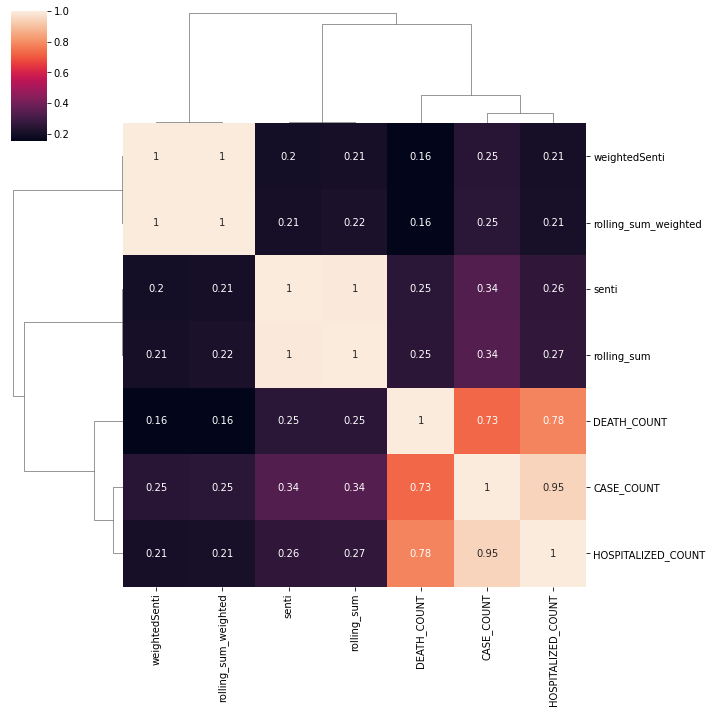

In [9]:
corrMerge = merged.corr()
print(corrMerge)
clustergrid = sns.clustermap(corrMerge,annot=True)

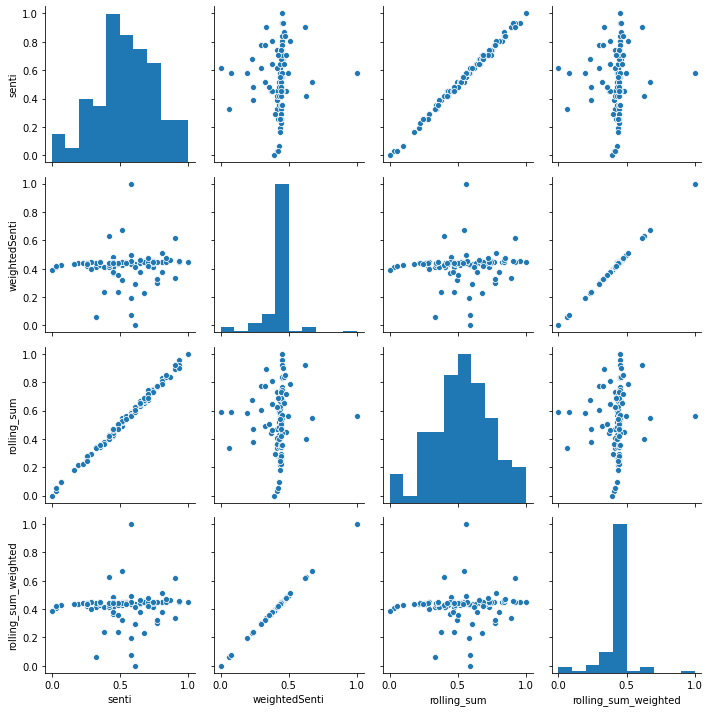

In [10]:
sns.pairplot(tDaily_ny_gen, height=2.5)
plt.tight_layout()

In [11]:
merged.head()

,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,senti,weightedSenti,rolling_sum,rolling_sum_weighted
2020-02-29 00:00:00+00:00,1,14,0,0.290323,0.603039,0.290323,0.564350
2020-03-01 00:00:00+00:00,1,4,0,0.419355,0.585566,0.408602,0.575300
2020-03-02 00:00:00+00:00,0,22,0,0.516129,0.681263,0.516129,0.669942
2020-03-03 00:00:00+00:00,2,20,0,0.322581,0.588953,0.333333,0.580419
2020-03-04 00:00:00+00:00,5,22,0,0.451613,0.601223,0.440860,0.590911


In [12]:
nytDaily_gen = pd.read_csv('nytDaily_gen.csv',parse_dates=['date'],date_parser=parser,index_col=['date'])
nytDaily_covid = pd.read_csv('nytDaily_covid.csv',parse_dates=['date'],date_parser=parser,index_col=['date'])


In [13]:
nytDaily_gen.head()

,scA,scH,scL,scComb,rolling_sum
date,,,,,
2020-01-21 00:00:00+00:00,0.000000,1.000000,1.000000,2.000000,NaN
2020-01-22 00:00:00+00:00,0.333333,0.333333,0.666667,1.333333,4.333333
2020-01-23 00:00:00+00:00,1.000000,1.000000,0.000000,2.000000,6.000000
2020-01-24 00:00:00+00:00,1.000000,1.000000,1.000000,3.000000,6.000000
2020-01-25 00:00:00+00:00,0.750000,0.750000,1.000000,2.500000,7.750000


In [14]:
fullMerge = pd.merge(left=merged, right=nytDaily_gen, left_index=True,right_index=True)

In [15]:
fullMerge.head()

,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,senti,weightedSenti,rolling_sum_x,rolling_sum_weighted,scA,scH,scL,scComb,rolling_sum_y
2020-02-29 00:00:00+00:00,1,14,0,0.290323,0.603039,0.290323,0.564350,0.000000,1.000000,0.000000,1.000000,5.000000
2020-03-01 00:00:00+00:00,1,4,0,0.419355,0.585566,0.408602,0.575300,0.000000,0.000000,0.000000,0.000000,2.000000
2020-03-02 00:00:00+00:00,0,22,0,0.516129,0.681263,0.516129,0.669942,0.666667,0.333333,0.666667,1.666667,2.666667
2020-03-03 00:00:00+00:00,2,20,0,0.322581,0.588953,0.333333,0.580419,1.000000,0.500000,0.750000,2.250000,6.750000
2020-03-04 00:00:00+00:00,5,22,0,0.451613,0.601223,0.440860,0.590911,NaN,NaN,NaN,NaN,NaN


                      CASE_COUNT  HOSPITALIZED_COUNT  DEATH_COUNT     senti  \
CASE_COUNT              1.000000            0.948661     0.730299  0.335808   
HOSPITALIZED_COUNT      0.948661            1.000000     0.782964  0.264011   
DEATH_COUNT             0.730299            0.782964     1.000000  0.250089   
senti                   0.335808            0.264011     0.250089  1.000000   
weightedSenti           0.247279            0.207066     0.156832  0.199905   
rolling_sum_x           0.344551            0.267289     0.252578  0.996191   
rolling_sum_weighted    0.251371            0.210283     0.160111  0.206899   
scA                     0.036776            0.047277    -0.033048  0.035704   
scH                    -0.032656           -0.060240    -0.013586  0.088440   
scL                     0.218630            0.262016     0.373607  0.168980   
scComb                  0.116162            0.130070     0.171385  0.151488   
rolling_sum_y           0.027626            0.061049

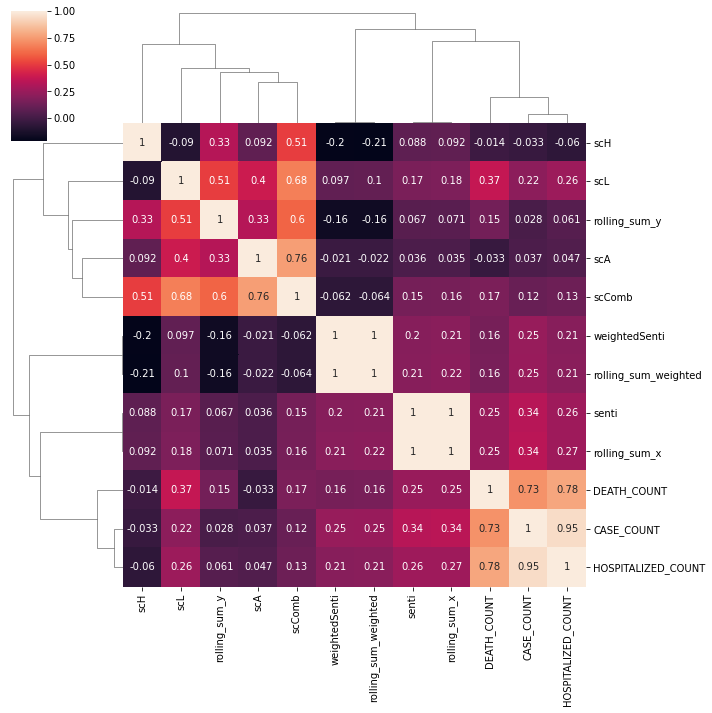

In [16]:
corrFM = fullMerge.corr()
print(corrFM)
clustergrid = sns.clustermap(corrFM,annot=True)

In [17]:
# coor map shows us that there is strongest correlation between....
# senti/rolling sum and case count
# scL and DeathCount
# scL and rolling sum
# so we can drop everything else
tDaily_gen = tDaily_gen.drop(columns=['senti','weightedSenti','rolling_sum_weighted'])
tDaily_ny_gen = tDaily_ny_gen.drop(columns=['senti','weightedSenti','rolling_sum_weighted'])
tDaily_ny_covid = tDaily_ny_covid.drop(columns=['senti','weightedSenti','rolling_sum_weighted'])


nytDaily_gen = nytDaily_gen.drop(columns=['scA','scH','scComb','rolling_sum'])
nytDaily_covid = nytDaily_covid.drop(columns=['scA','scH','scComb','rolling_sum'])

In [18]:
tDaily_gen = tDaily_gen.rename(columns={'rolling_sum':'t_gen'})
tDaily_ny_gen = tDaily_ny_gen.rename(columns={'rolling_sum':'t_ny_gen'})
tDaily_ny_covid = tDaily_ny_covid.rename(columns={'rolling_sum':'t_ny_covid'})

nytDaily_gen = nytDaily_gen.rename(columns={'scL':'nyt_gen'})
nytDaily_covid = nytDaily_covid.rename(columns={'scL':'nyt_covid'})

In [19]:
df = [nyc_actual, tDaily_gen, tDaily_ny_covid, nytDaily_gen, nytDaily_covid]

In [20]:
from functools import reduce


In [21]:
df_merged = reduce(lambda  left,right: pd.merge(left, right, left_index=True,right_index=True), df)
df_merged = df_merged.interpolate(method='linear')
#from scipy import stats
#df_merged['nyt_gen'] = df_merged['nyt_gen'][df_merged['nyt_gen'].between(df_merged['nyt_gen'].quantile(.15), df_merged['nyt_gen'].quantile(.85))] # without outliers
#df_merged['t_gen'] = df_merged['t_gen'][df_merged['t_gen'].between(df_merged['t_gen'].quantile(.15), df_merged['t_gen'].quantile(.85))] # without outliers

In [22]:
print(df_merged[15:20])

                           CASE_COUNT  HOSPITALIZED_COUNT  DEATH_COUNT  \
2020-03-15 00:00:00+00:00        1032                 192            6   
2020-03-16 00:00:00+00:00        2122                 307            9   
2020-03-17 00:00:00+00:00        2453                 355            8   
2020-03-18 00:00:00+00:00        2976                 468           20   
2020-03-19 00:00:00+00:00        3706                 552           24   

                              t_gen  t_ny_covid  nyt_gen  nyt_covid  
2020-03-15 00:00:00+00:00  0.548387    0.386861     0.25   0.000000  
2020-03-16 00:00:00+00:00  0.580645    0.560369     0.50   0.500000  
2020-03-17 00:00:00+00:00  0.838710    0.810219     1.00   0.200000  
2020-03-18 00:00:00+00:00  0.462366    0.544620     0.50   0.666667  
2020-03-19 00:00:00+00:00  0.838710    0.177781     0.00   0.625000  


In [23]:
nyc_actual.head()

,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
DATE_OF_INTEREST,,,
2020-02-29 00:00:00+00:00,1,14,0
2020-03-01 00:00:00+00:00,1,4,0
2020-03-02 00:00:00+00:00,0,22,0
2020-03-03 00:00:00+00:00,2,20,0
2020-03-04 00:00:00+00:00,5,22,0


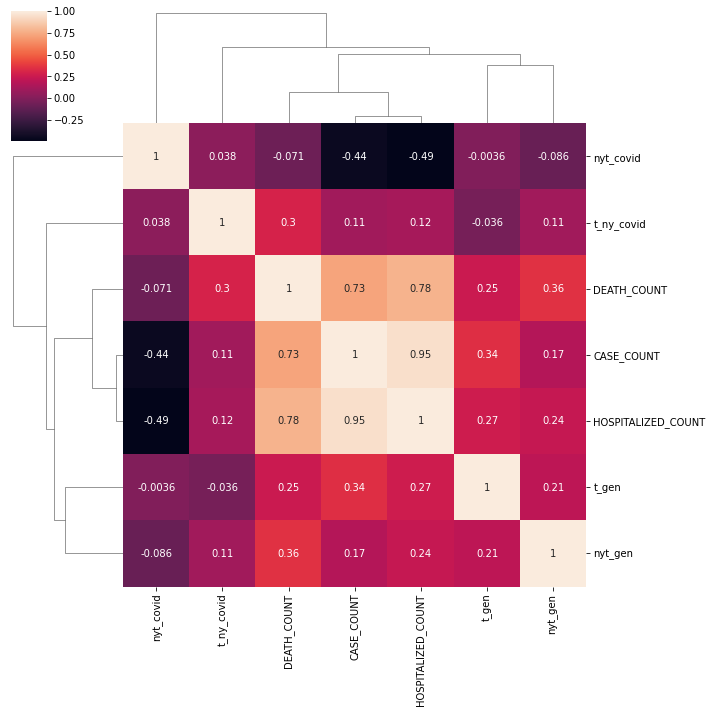

In [24]:
corr_all = df_merged.corr()

clustergrid = sns.clustermap(corr_all,annot=True)

In [25]:
# lets use the t_gen to predict case count, and the nyt_gen/t_ny_covid to predict death count 
# mybe we can get better corrleations by combining somehting? 
df_merged['x_factor'] = df_merged['nyt_gen'].multiply(df_merged['t_gen'])

def inverse(x):
    if x is None: 
        return None
    else:
        return 1-x
    
df_merged['x_factor_inv'] = df_merged['x_factor'].apply(lambda x : inverse(x))
df_merged['t_gen_inv'] = df_merged['t_gen'].apply(lambda x : inverse(x))


In [26]:
df_merged.head()

,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,t_gen,t_ny_covid,nyt_gen,nyt_covid,x_factor,x_factor_inv,t_gen_inv
2020-02-29 00:00:00+00:00,1,14,0,0.290323,0.535364,0.000000,NaN,0.000000,1.000000,0.709677
2020-03-01 00:00:00+00:00,1,4,0,0.408602,0.397289,0.000000,NaN,0.000000,1.000000,0.591398
2020-03-02 00:00:00+00:00,0,22,0,0.516129,0.181155,0.666667,NaN,0.344086,0.655914,0.483871
2020-03-03 00:00:00+00:00,2,20,0,0.333333,0.673966,0.750000,NaN,0.250000,0.750000,0.666667
2020-03-04 00:00:00+00:00,5,22,0,0.440860,0.343066,0.625000,NaN,0.275538,0.724462,0.559140


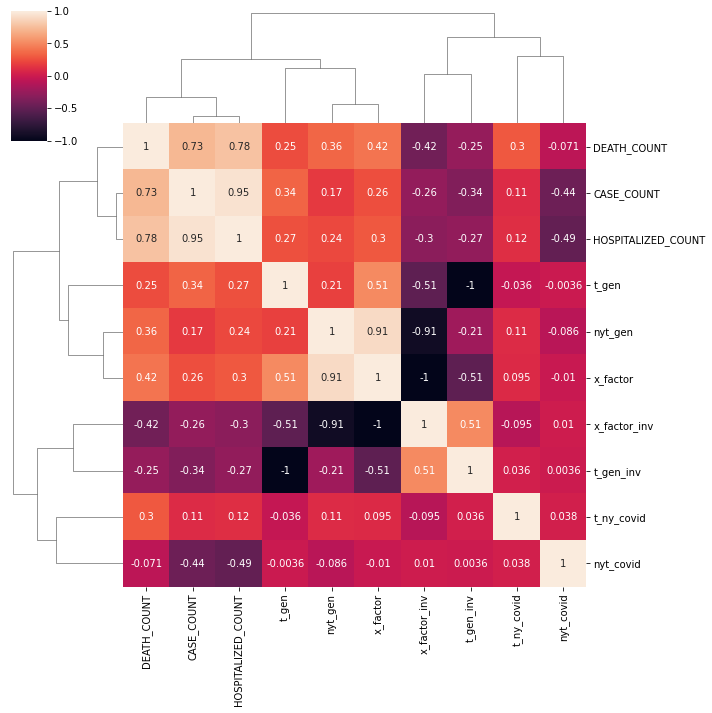

In [27]:
corr_all = df_merged.corr()
clustergrid = sns.clustermap(corr_all,annot=True)

In [28]:
# FINAL OPINION:
# for correlating the death count, the x_factor_cases is the best
# for correlating the case count, the t_gen is the best
# lets save something here
#df_merged.to_csv('df_merged_tweet_nyt_caseNumbers.csv')

In [29]:
# lets train a model with it. 
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

df_normal = min_max_scaler.fit_transform(df_merged)
df_normal = pd.DataFrame(df_normal,columns=["CASE_COUNT",'HOSPITALIZED_COUNT','DEATH_COUNT','t_gen','t_ny_covid','nyt_gen','nyt_covid','x_factor','x_factor_inv','t_gen_inv'])
df_normal['f_diff_xFactor'] = df_normal['x_factor'].diff()
df_normal['f_diff_DEATH_COUNT'] = df_normal['DEATH_COUNT'].diff()

df_normal.head()

,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,t_gen,t_ny_covid,nyt_gen,nyt_covid,x_factor,x_factor_inv,t_gen_inv,f_diff_xFactor,f_diff_DEATH_COUNT
0,0.000158,0.005935,0.0,0.057143,0.465083,0.000000,NaN,0.000000,1.000000,0.942857,NaN,NaN
1,0.000158,0.000000,0.0,0.214286,0.306122,0.000000,NaN,0.000000,1.000000,0.785714,0.000000,0.0
2,0.000000,0.010682,0.0,0.357143,0.057296,0.666667,NaN,0.344086,0.655914,0.642857,0.344086,0.0
3,0.000315,0.009496,0.0,0.114286,0.624650,0.750000,NaN,0.250000,0.750000,0.885714,-0.094086,0.0
4,0.000788,0.010682,0.0,0.257143,0.243697,0.625000,NaN,0.275538,0.724462,0.742857,0.025538,0.0


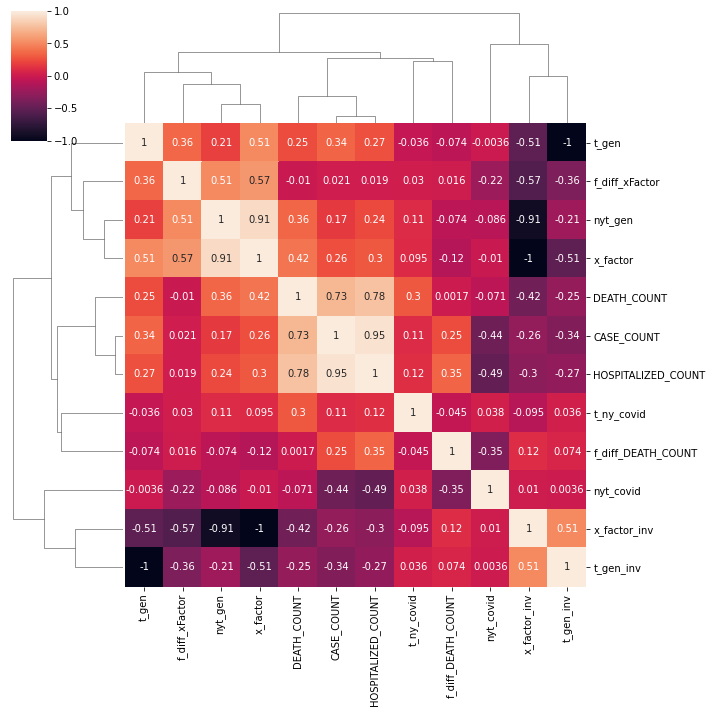

In [52]:
cl = df_normal.corr()
clustergrid = sns.clustermap(cl,annot=True)

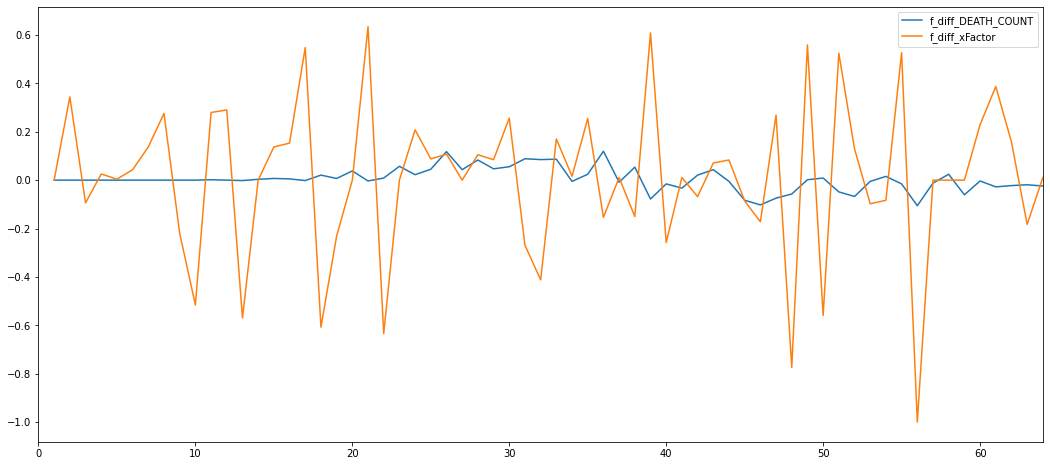

In [51]:
#plot(df['x_factor'],df['DEATH_COUNT'])
# remove the outliers
df_normal.plot(y=['f_diff_DEATH_COUNT','f_diff_xFactor'],use_index=True)

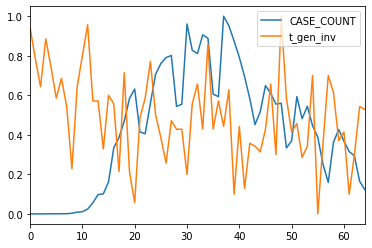

In [32]:
df_normal.plot(y=['CASE_COUNT','t_gen_inv'],use_index=True)

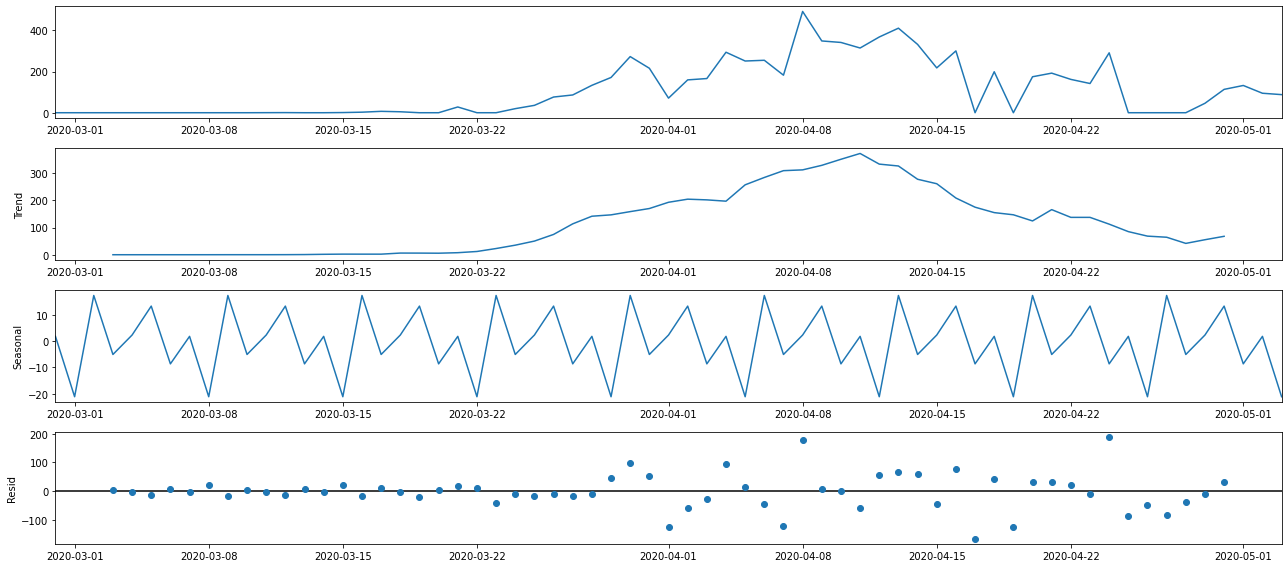

In [144]:
from pylab import rcParams
import statsmodels.api as sm


rcParams['figure.figsize'] = 18, 8

y = df_merged['DEATH_COUNT'].multiply(df_merged['x_factor'])

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [161]:
'''p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
'''
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [162]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:842.9917735181239
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:682.5180505343781
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:686.7349100521857
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:535.229799886331
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:690.2877681843571
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:679.8918656493139
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:551.6415310471455
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:534.1115061724147
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:799.669986788513


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:649.4801456534834
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:656.1207640327002
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:506.9682835468023


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:669.6545472206061
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:648.3524863108963
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:536.3778531990807


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:507.9447452990181
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:751.1393400106331
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:620.7690486390809
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:643.0141629149609
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:487.748176047929
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:631.720452823256


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:622.6391687954207
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:505.3654396046348
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:489.60478401289436


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:725.3400659986897
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:598.4669988517023
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:623.4109721217856


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:468.4664925302035
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:620.1225434034089
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:600.4569726507827


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:496.57922310190304


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:470.229083131722
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:759.4593452226902
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:629.7022875419797
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:649.2003547991382


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:496.9793358190891
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:629.3683676702518
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:631.3672733891137


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:503.6739928997931


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:498.91941976606506
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:737.3226012563395
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:610.7774744459177
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:634.6439392360337


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:480.69216821062054
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:621.551792742744
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:612.746483015006


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:498.0637415205558


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:482.3632257623321
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:734.1116311826906
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:607.7276995547221
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:635.7795992755802


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:479.97107261212227
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:607.6892463865515
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:609.6878895117775
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:484.5730045634889


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:481.5540325139493
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:725.4411106090964
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:598.8834715718284
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:625.4077359854685


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:470.09977862908704
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:609.66052526725
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:600.8520010189313


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No f

ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:486.2020269792512


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:471.7004822804318


In [163]:
#ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:370.8249781548297

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2293      0.320     -0.717      0.474      -0.856       0.398
ma.L1         -0.3043      0.319     -0.954      0.340      -0.929       0.321
ma.S.L12      -1.0001      0.227     -4.400      0.000      -1.446      -0.555
sigma2      8350.8038   2.72e-05   3.07e+08      0.000    8350.804    8350.804


/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/salvy/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


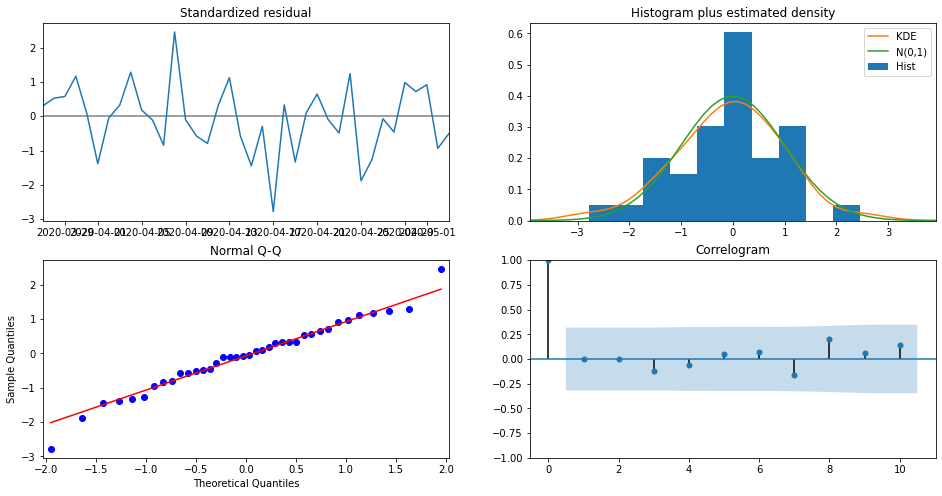

In [164]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [165]:
pred = results.get_prediction()
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
print('The Root Mean Error Ratio is roughly {}%'.format((round(np.sqrt(mse),2)/600)*100))

The Mean Squared Error of our forecasts is 6552.86
The Root Mean Squared Error of our forecasts is 80.95
The Root Mean Error Ratio is roughly 13.491666666666669%


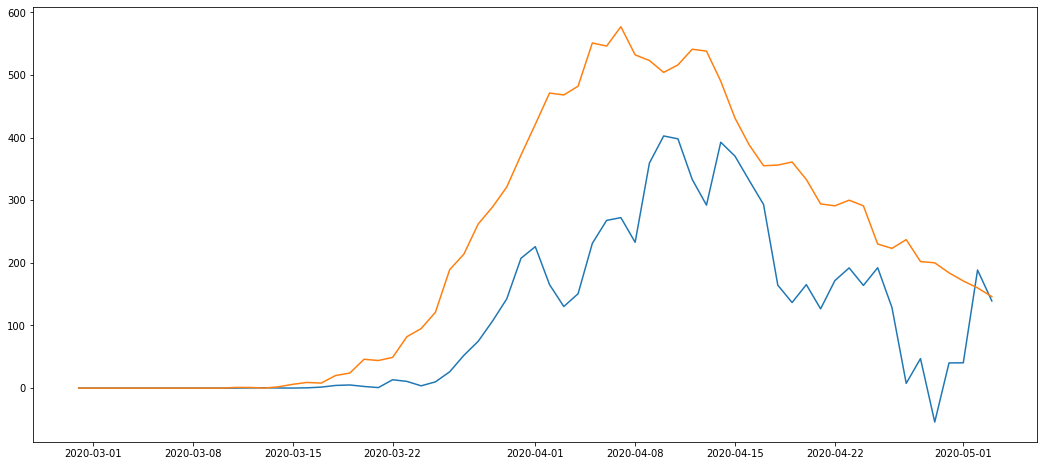

In [166]:
import matplotlib.pyplot as pls
pls.plot(y_forecasted)
pls.plot(df_merged['DEATH_COUNT'])

In [ ]:
df_normal.drop(columns=[''])

METRICS
MAE 0.272351905864778
MSE 0.10287604005395704
RMSE 0.32074295012354836
R squared error 0.34146793874046244


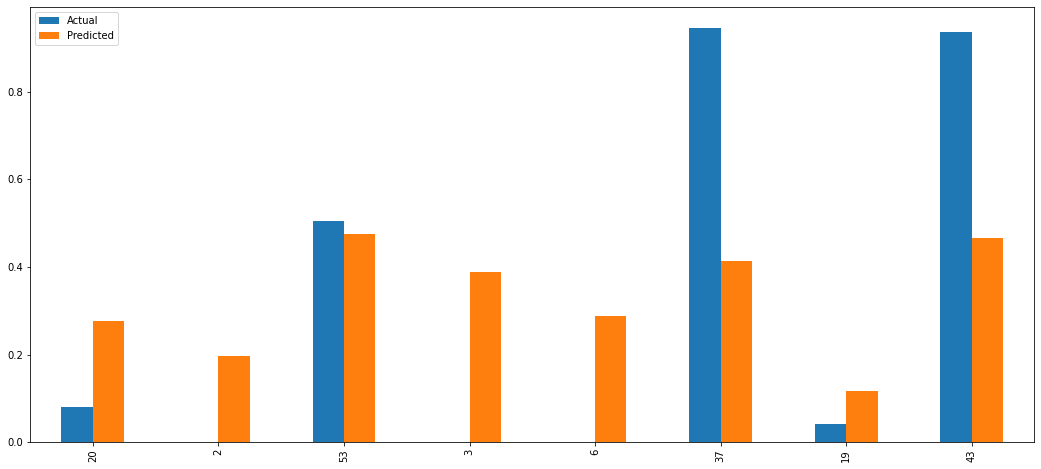

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

X = df_normal.drop(columns=['f_diff_DEATH_COUNT','f_diff_xFactor','nyt_covid','DEATH_COUNT','CASE_COUNT','HOSPITALIZED_COUNT'])
y = df_normal['DEATH_COUNT']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.11, random_state = 10)

lm = LinearRegression()
#lm = RandomForestRegressor(n_estimators=100)
lm.fit(X_train,y_train)
prediction = lm.predict(X_test)
#plt.scatter(y_test,prediction)

df = pd.DataFrame({'Actual':y_test,'Predicted':prediction})
df.plot(kind = 'bar')

print("METRICS")
print('MAE', metrics.mean_absolute_error(y_test, prediction))
print('MSE', metrics.mean_squared_error(y_test, prediction))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R squared error', r2_score(y_test, prediction))


                           CASE_COUNT  HOSPITALIZED_COUNT  DEATH_COUNT  \
2020-02-29 00:00:00+00:00           1                  14            0   
2020-03-01 00:00:00+00:00           1                   4            0   
2020-03-02 00:00:00+00:00           0                  22            0   
2020-03-03 00:00:00+00:00           2                  20            0   
2020-03-04 00:00:00+00:00           5                  22            0   
...                               ...                 ...          ...   
2020-04-29 00:00:00+00:00        2334                 419          200   
2020-04-30 00:00:00+00:00        2003                 329          184   
2020-05-01 00:00:00+00:00        1863                 365          171   
2020-05-02 00:00:00+00:00        1047                 267          160   
2020-05-03 00:00:00+00:00         776                 238          146   

                              t_gen  t_ny_covid   nyt_gen  nyt_covid  \
2020-02-29 00:00:00+00:00  0.290323    

In [132]:
df = df_merged
df.tz_localize(None)
df.index = df.index.tz_convert(None)
df = df_merged.reset_index(level=None)
df.head()

,index,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,t_gen,t_ny_covid,nyt_gen,nyt_covid,x_factor,x_factor_inv,t_gen_inv
0,2020-02-29,1,14,0,0.290323,0.535364,0.000000,NaN,0.000000,1.000000,0.709677
1,2020-03-01,1,4,0,0.408602,0.397289,0.000000,NaN,0.000000,1.000000,0.591398
2,2020-03-02,0,22,0,0.516129,0.181155,0.666667,NaN,0.344086,0.655914,0.483871
3,2020-03-03,2,20,0,0.333333,0.673966,0.750000,NaN,0.250000,0.750000,0.666667
4,2020-03-04,5,22,0,0.440860,0.343066,0.625000,NaN,0.275538,0.724462,0.559140


In [133]:
df = df.rename(columns={'index' : 'ds', 'DEATH_COUNT' : 'y'})

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


KeyError: 'yhat'

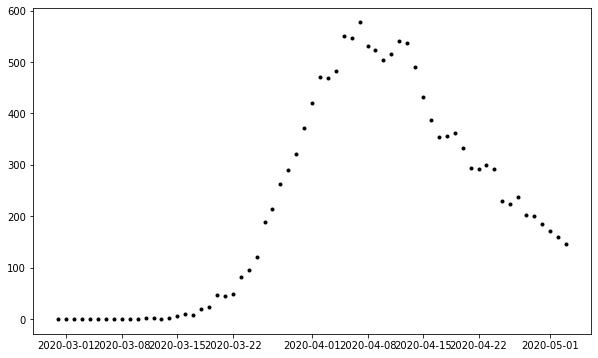

In [139]:
import fbprophet
# Put market cap in billions

prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
prophet.fit(df)

fore = prophet.make_future_dataframe(periods=30,freq='D')

forecast = prophet.predict(fore)

prophet.plot(df, xlabel = "Date", ylabel="prediction")